<a href="https://colab.research.google.com/github/callezenwaka/pytorch-deep-learning/blob/main/pytorch%20exercises/Fashion-MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='https://github.com/callezenwaka/pytorch-deep-learning/blob/main/pytorch%20exercises/assets/fashion-mnist-sprite.png?raw=1' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
# import request package
import requests

In [2]:
# download helper.py file
helper_url = 'https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py'
r = requests.get(helper_url)

# make sure your filename is the same as how you want to import 
with open('helper.py', 'w') as f:
    f.write(r.text)

In [3]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Here we can see one of the images.

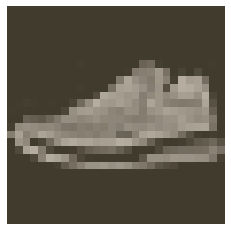

In [4]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [5]:
# TODO: Define your network architecture here
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

print(f"model:\n{model}")

model:
Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)


# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [6]:
# define hyperparameters
learning_rate = 0.03
epochs = 5

In [7]:
# TODO: Create the network, define the criterion and optimizer
from torch import optim

# define criterion
criterion = nn.NLLLoss()

# define optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [8]:
# TODO: Train the network here
for epoch in range(epochs):

  # define running loss variable
  running_loss = 0

  # run through training dataset
  for images, labels in trainloader:
    # resize images
    images = images.view(images.shape[0], -1)

    # zero all gradients
    optimizer.zero_grad()

    # forward pass
    output = model(images)

    # calculate loss
    loss = criterion(output, labels)

    # backward pass
    loss.backward()

    # update weights
    optimizer.step()

    # calculate running cost
    running_loss += loss.item()

  else:
    print(f"Epoch: {epoch} | Training loss: {running_loss / len(trainloader) }")


Epoch: 0 | Training loss: 0.826554321753445
Epoch: 1 | Training loss: 0.47523672152747476
Epoch: 2 | Training loss: 0.4160219858418395
Epoch: 3 | Training loss: 0.38111054468383665
Epoch: 4 | Training loss: 0.3558944864377284


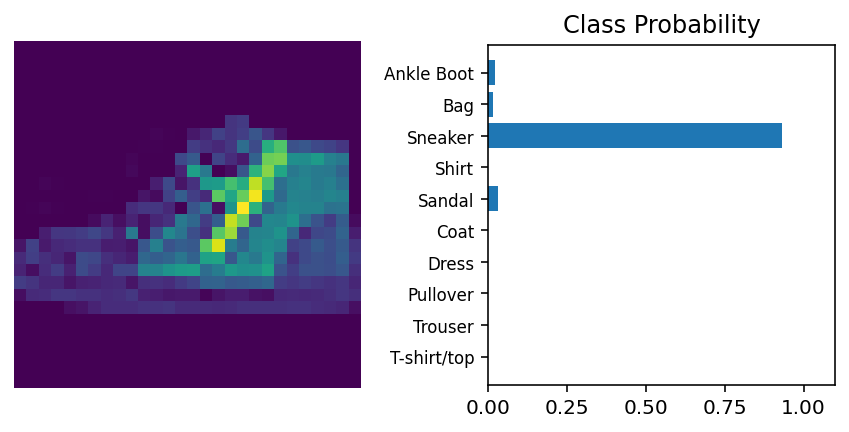

In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
image = images[0]
# Convert 2D image to 1D vector
image = image.view(image.shape[0], -1)

# TODO: Calculate the class probabilities (softmax) for image
# Turn off gradients to speed up this part
with torch.no_grad():
  logps = model(image)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(model(image))

# Plot the image and probabilities
helper.view_classify(image.view(1, 28, 28), ps, version='Fashion')